In [279]:
import pandas as pd

In [280]:
data=pd.read_csv("train.csv")

In [281]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [282]:
import matplotlib.pyplot as plt
import seaborn as sns

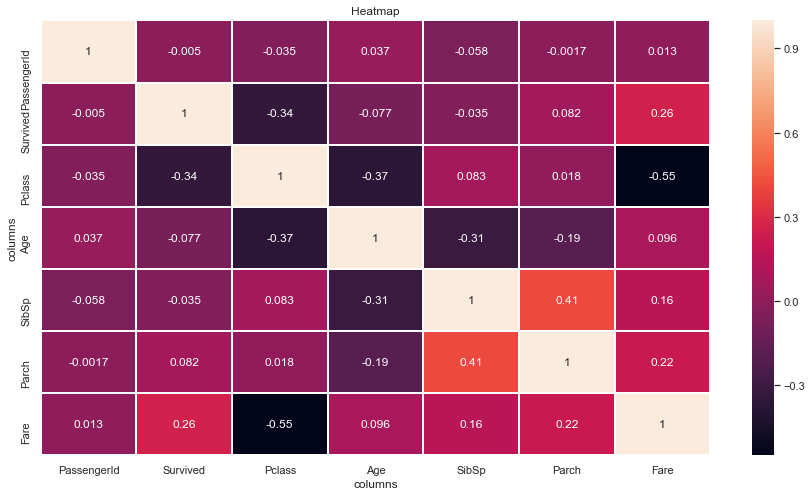

In [283]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True,linewidth=1,linecolor="w")
plt.xlabel("columns")
plt.ylabel("columns")
plt.title("Heatmap")
plt.savefig("titanic.png")

In [284]:
def convertor(x):
    if(x=="male"):
        return 1
    if(x=="female"):
        return 0
data["Gender"]=data["Sex"].apply(convertor)
data["Gender"]

0      1
1      0
2      0
3      0
4      1
5      1
6      1
7      1
8      0
9      0
10     0
11     0
12     1
13     1
14     0
15     0
16     1
17     1
18     0
19     0
20     1
21     1
22     0
23     1
24     0
25     0
26     1
27     1
28     0
29     1
      ..
861    1
862    0
863    0
864    1
865    0
866    0
867    1
868    1
869    1
870    1
871    0
872    1
873    1
874    0
875    0
876    1
877    1
878    1
879    0
880    0
881    1
882    0
883    1
884    1
885    0
886    1
887    0
888    0
889    1
890    1
Name: Gender, Length: 891, dtype: int64

In [285]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Gender         891 non-null int64
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [286]:
training_data=data[["PassengerId","Pclass","Fare","Gender"]]
output_data=data["Survived"]

In [287]:
from sklearn.model_selection import train_test_split

In [288]:
X,x_test,Y,y_test=train_test_split(training_data,output_data,test_size=0.3,random_state=42)

In [289]:
from sklearn.linear_model import LogisticRegression

In [290]:
model=LogisticRegression()

In [291]:
model.fit(X, Y)

C:\Users\nmoj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [292]:
predictions=model.predict(x_test)

In [293]:
predictions[:5]

array([0, 0, 0, 1, 1], dtype=int64)

In [294]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [295]:
score=round(100*accuracy_score(predictions,y_test),2)

In [296]:
score

78.73

# Prediction on testData

In [297]:
test_data=pd.read_csv("test.csv")

In [298]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [299]:
def convertor(x):
    if(x=="male"):
        return 1
    if(x=="female"):
        return 0
test_data["Gender"]=test_data["Sex"].apply(convertor)
test_data["Gender"]

0      1
1      0
2      1
3      1
4      0
5      1
6      0
7      1
8      0
9      1
10     1
11     1
12     0
13     1
14     0
15     0
16     1
17     1
18     0
19     0
20     1
21     1
22     0
23     1
24     0
25     1
26     0
27     1
28     1
29     1
      ..
388    1
389    1
390    1
391    0
392    1
393    1
394    1
395    0
396    1
397    0
398    1
399    1
400    0
401    1
402    0
403    1
404    1
405    1
406    1
407    1
408    0
409    0
410    0
411    0
412    0
413    1
414    0
415    1
416    1
417    1
Name: Gender, Length: 418, dtype: int64

In [300]:
test_data=test_data[["PassengerId","Pclass","Fare","Gender"]]

In [301]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Fare           1
Gender         0
dtype: int64

In [302]:
test_data["Fare"]=test_data["Fare"].fillna(test_data["Fare"].mean())

In [303]:
predictions=model.predict(test_data)
predictions

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

# submission file

In [304]:
submission=pd.DataFrame({
    "PassengerId":test_data["PassengerId"],
    "Survived":predictions
})

In [305]:
submission=submission.set_index("PassengerId")

In [306]:
submission.to_csv("submit.csv")

# 100%stacked bar chart

In [307]:
passenger_class=data["Pclass"]

In [308]:
passenger_class.head()

0    3
1    1
2    3
3    1
4    3
Name: Pclass, dtype: int64

In [309]:
survived=data["Survived"]

In [310]:
survived.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [311]:
survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [312]:
passenger_class.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [313]:
new_data=data.groupby(["Pclass","Survived"])["Survived"].count()

In [314]:
new_data.head()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
Name: Survived, dtype: int64

In [315]:
new_data_percentage = new_data.groupby(level=0).apply(lambda x: round(100*x/float(x.sum())))
        

In [316]:
new_data_percentage

Pclass  Survived
1       0           37.0
        1           63.0
2       0           53.0
        1           47.0
3       0           76.0
        1           24.0
Name: Survived, dtype: float64

In [317]:
font={
    "size":"30",
    "weight":"bold"
}

In [318]:
sns.set(rc={"figure.figsize":(15,8)})

In [319]:
new_data_percentage.head(6)

Pclass  Survived
1       0           37.0
        1           63.0
2       0           53.0
        1           47.0
3       0           76.0
        1           24.0
Name: Survived, dtype: float64

In [320]:
new_data_percentage

Pclass  Survived
1       0           37.0
        1           63.0
2       0           53.0
        1           47.0
3       0           76.0
        1           24.0
Name: Survived, dtype: float64

In [321]:
cross_data = pd.crosstab(data['Pclass'], data['Survived'])

In [322]:
cross_data

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [323]:
cross_data['total'] = cross_data.sum(axis=1)

In [324]:
cross_data

Survived,0,1,total
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491


In [325]:
new_data_percentage = cross_data.apply(lambda x:round(100*(x/cross_data['total'])))

In [326]:
new_data_percentage

Survived,0,1,total
Pclass,,,
1,37.0,63.0,100.0
2,53.0,47.0,100.0
3,76.0,24.0,100.0


In [327]:
new_data_percentage.drop('total', axis=1, inplace=True)

In [328]:
new_data_percentage

Survived,0,1
Pclass,,
1,37.0,63.0
2,53.0,47.0
3,76.0,24.0


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

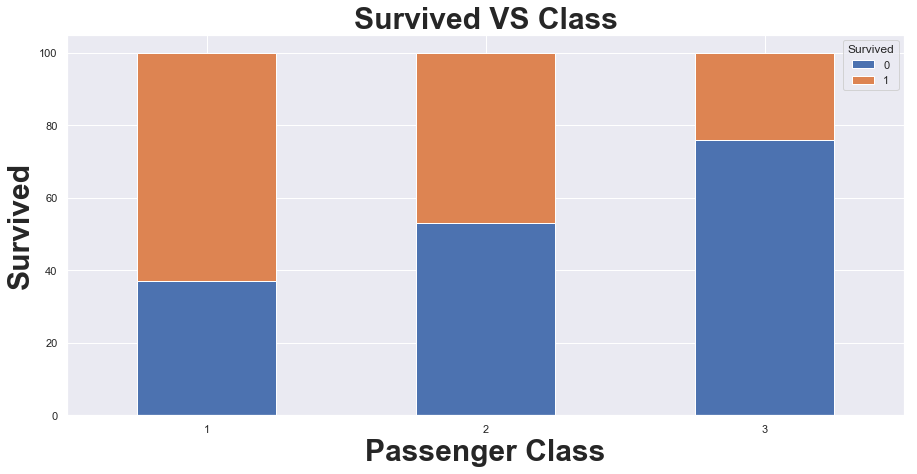

In [330]:
sns.set(rc={'figure.figsize':(15,7)})
new_data_percentage.plot(kind="bar",stacked=True)
plt.xlabel("Passenger Class",fontdict=font)
plt.ylabel("Survived",fontdict=font)
plt.title("Survived VS Class",fontdict=font)
plt.xticks(rotation=0)